<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/deeplearningstudy/blob/main/yolo_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:03<00:00, 41.3MB/s]


In [5]:
# Colab에서 YAML 수정
yaml_path = '/content/drive/MyDrive/kdt_2506/dataset/foodDataset/data.yaml'

with open(yaml_path, 'r') as f:
    lines = f.readlines()

with open(yaml_path, 'w') as f:
    for line in lines:
        if line.startswith('train:'):
            f.write('train: /content/drive/MyDrive/kdt_2506/dataset/foodDataset/images/train\n')
        elif line.startswith('val:'):
            f.write('val: /content/drive/MyDrive/kdt_2506/dataset/foodDataset/images/val\n')
        else:
            f.write(line)

In [6]:
model.train(data = '/content/drive/MyDrive/kdt_2506/dataset/foodDataset/data.yaml',
            epochs=50,
            imgsz=800,
            conf=0.25,
            batch=16,
            save=True,         # 학습 중 모델 저장
            save_period=1,     # n 에폭마다 저장
            project='runs/train',
            name='exp',
            exist_ok=True
            )

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=0.25, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/kdt_2506/dataset/foodDataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=800, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspec

100%|██████████| 22.2M/22.2M [00:00<00:00, 36.5MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              


  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280, 640, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 403MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.3±0.2 MB/s, size: 327.7 KB)


train: Scanning /content/drive/MyDrive/kdt_2506/dataset/foodDataset/labels/train.cache... 640 images, 0 backgrounds, 0 corrupt: 100%|██████████| 640/640 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 0.5±0.3 MB/s, size: 435.2 KB)


val: Scanning /content/drive/MyDrive/kdt_2506/dataset/foodDataset/labels/val.cache... 160 images, 0 backgrounds, 1 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]

val: /content/drive/MyDrive/kdt_2506/dataset/foodDataset/images/val/B010316XX_02412.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0022]


Plotting labels to runs/train/exp/labels.jpg... 


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 48288 (\N{HANGUL SYLLABLE BE}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytic

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 800 train, 800 val
Using 8 dataloader workers
Logging results to runs/train/exp
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      17.4G     0.9764      4.555      1.623         51        800:   2%|▎         | 1/40 [00:14<09:25, 14.49s/it]

       1/50      17.4G      1.028      4.728      1.703         40        800:  12%|█▎        | 5/40 [00:17<01:01,  1.75s/it]
100%|██████████| 755k/755k [00:00<00:00, 82.7MB/s]
       1/50      17.5G     0.9097      3.079      1.511         45        800: 100%|██████████| 40/40 [01:00<00:00,  1.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.46it/s]

                   all        159        182      0.229      0.459      0.218      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50        18G      1.022      2.181      1.554         44        800: 100%|██████████| 40/40 [00:12<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]

                   all        159        182      0.187      0.285      0.174       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      18.1G       1.16      2.146      1.648         42        800: 100%|██████████| 40/40 [00:12<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.15it/s]

                   all        159        182      0.192      0.117     0.0545     0.0345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      18.1G      1.114      1.987      1.599         45        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all        159        182      0.207      0.205     0.0817     0.0449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50        18G      1.087       1.88      1.597         41        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.12it/s]

                   all        159        182      0.178      0.162      0.143      0.098



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50        18G      1.047      1.697      1.558         38        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]

                   all        159        182      0.463      0.594      0.531      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50        18G     0.9896      1.646      1.518         41        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]

                   all        159        182      0.316       0.28      0.257      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      18.1G     0.9717      1.577      1.493         48        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.32it/s]

                   all        159        182      0.451      0.538      0.467      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50        18G     0.9452      1.506      1.502         44        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]

                   all        159        182      0.457      0.538      0.497      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50        18G     0.9297      1.411      1.454         42        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.24it/s]

                   all        159        182      0.486      0.604      0.559      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      18.1G     0.9059      1.344      1.429         48        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.03it/s]

                   all        159        182      0.576      0.578      0.596      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50        18G     0.9246      1.363      1.463         41        800: 100%|██████████| 40/40 [00:12<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]

                   all        159        182      0.544      0.665      0.658      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50        18G     0.8856       1.31      1.441         33        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.22it/s]

                   all        159        182      0.474      0.624        0.6      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      18.1G     0.8546      1.218      1.396         41        800: 100%|██████████| 40/40 [00:12<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all        159        182      0.454      0.712      0.625      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      18.1G      0.895      1.255      1.433         42        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.05it/s]

                   all        159        182      0.544      0.756      0.678      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      18.1G     0.8113      1.167      1.362         50        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]

                   all        159        182      0.615      0.676      0.654      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      18.1G     0.8328      1.122      1.382         43        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.22it/s]

                   all        159        182      0.669      0.596      0.664      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      18.1G     0.8243       1.07      1.362         41        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.12it/s]

                   all        159        182      0.653      0.799      0.748      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      18.1G     0.7858      1.045      1.342         45        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.15it/s]

                   all        159        182      0.739      0.694      0.777      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      18.1G     0.7834      1.026      1.351         50        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all        159        182      0.608      0.737      0.704      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      18.1G     0.7583     0.9949      1.318         48        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]

                   all        159        182      0.615      0.733      0.684      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      18.1G     0.7419     0.9712      1.304         39        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.10it/s]

                   all        159        182      0.681      0.644      0.704      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      18.1G     0.7154     0.8898      1.272         44        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]

                   all        159        182      0.709      0.661      0.717       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      18.1G     0.7346     0.8971      1.291         57        800: 100%|██████████| 40/40 [00:12<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.22it/s]

                   all        159        182      0.704      0.739      0.748      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50        18G     0.7263     0.8951      1.289         52        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]

                   all        159        182      0.681      0.682      0.657      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50        18G     0.7031      0.834      1.273         57        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]

                   all        159        182        0.7      0.759      0.769       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50        18G     0.7103     0.8827       1.27         56        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]

                   all        159        182      0.671      0.749      0.709      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      18.1G     0.6916     0.8053      1.262         57        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.17it/s]

                   all        159        182      0.625       0.79      0.769      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      18.1G     0.6956     0.8212       1.25         54        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.02it/s]

                   all        159        182      0.743      0.789      0.812      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      18.1G     0.6563     0.7503      1.228         48        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.28it/s]

                   all        159        182      0.733      0.837      0.812      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      18.1G     0.6691     0.7747      1.239         48        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.21it/s]

                   all        159        182      0.752       0.82      0.794       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      18.1G     0.6309     0.7369      1.217         49        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]

                   all        159        182      0.701      0.771      0.732      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      18.1G     0.6303     0.7358      1.221         56        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]

                   all        159        182      0.716      0.783      0.761      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      18.1G     0.6205     0.7039       1.21         45        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.19it/s]

                   all        159        182      0.763      0.757      0.775      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      18.1G     0.6117     0.6944        1.2         52        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.24it/s]

                   all        159        182      0.797        0.8      0.815       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      18.1G     0.6142     0.6879      1.204         50        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.22it/s]

                   all        159        182      0.669      0.789      0.729      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      18.1G     0.6015     0.6723      1.188         53        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all        159        182      0.752      0.764      0.777      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      18.1G     0.5801     0.6239      1.175         60        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.23it/s]

                   all        159        182       0.74      0.715      0.752      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      18.1G     0.5832      0.598      1.173         46        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.27it/s]

                   all        159        182      0.798      0.794      0.827      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      18.1G     0.5883     0.6174      1.179         45        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]

                   all        159        182      0.709      0.799      0.766      0.652


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      18.1G      0.509     0.5553      1.169         20        800: 100%|██████████| 40/40 [00:16<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.20it/s]

                   all        159        182      0.718      0.761       0.78      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      18.1G     0.4926     0.5065      1.151         20        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all        159        182      0.737      0.825      0.797      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      18.1G     0.4673     0.4634      1.116         18        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all        159        182      0.733      0.779      0.786      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      18.1G     0.4583      0.458      1.125         19        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.18it/s]

                   all        159        182      0.742      0.829      0.818      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      18.1G     0.4599      0.429      1.104         18        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.25it/s]

                   all        159        182      0.759      0.799       0.82      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50        18G     0.4345     0.3979      1.106         20        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.07it/s]

                   all        159        182      0.726      0.885      0.841      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      18.1G      0.428     0.4084      1.077         19        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.24it/s]

                   all        159        182      0.753      0.837      0.809      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50        18G     0.4152     0.4112      1.058         20        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.26it/s]

                   all        159        182      0.762      0.847      0.817      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50        18G     0.4177     0.3624      1.084         16        800: 100%|██████████| 40/40 [00:12<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.22it/s]

                   all        159        182      0.762      0.812      0.814      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      18.1G     0.3996     0.3318      1.054         18        800: 100%|██████████| 40/40 [00:12<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.07it/s]

                   all        159        182      0.772      0.779      0.807      0.693



50 epochs completed in 0.237 hours.
Optimizer stripped from runs/train/exp/weights/last.pt, 136.7MB
Optimizer stripped from runs/train/exp/weights/best.pt, 136.7MB

Validating runs/train/exp/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 68,133,198 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.45it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 48288 (\N{HANGUL SYLLABLE BE}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 5

                   all        159        182      0.724       0.88      0.839       0.71
                   백향과         16         19       0.56      0.737      0.715      0.587
               베이글샌드위치         16         21       0.84          1      0.966      0.881
                    보쌈         16         17       0.65      0.765      0.791      0.695
                   복숭아         16         26      0.514      0.692      0.627      0.507
                   볶음면         16         16      0.941          1      0.995      0.966
                   볶음밥         16         16      0.938      0.938      0.966      0.861
                   부침개         16         16      0.889          1      0.988      0.816
                   비빔밥         15         15      0.938          1      0.995      0.747
                     빵         16         18      0.529          1      0.789      0.496
                  사과파이         16         18      0.444      0.667       0.56      0.546
Speed: 0.2ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e3720c4a050>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [7]:
# from ultralytics import YOLO
# model = YOLO("yolov8n.pt")
# model.train(data='/content/drive/MyDrive/kdt_2506/dataset/dataset/data.yaml', epochs=50, imgsz=480)


In [8]:
model.info()

Model summary: 209 layers, 68,162,238 parameters, 0 gradients, 258.2 GFLOPs


(209, 68162238, 0, 258.17093120000004)

✅ 모델 요약 분석
🔹 1. 209 layers
총 209개의 레이어로 구성된 딥러닝 네트워크

Conv, BN, ReLU, C2f, SPPF 등 다양한 YOLO 구조 포함

🔹 2. 68,162,238 parameters
총 파라미터 수: 약 6,800만 개

대부분은 Conv 레이어의 weight와 bias에서 발생

참고 비교:

YOLOv8n: 약 3.2M

YOLOv8s: 약 11.2M

YOLOv8m: 약 25.9M

YOLOv8l: 약 43.7M

현재 모델은 YOLOv8x로 추정됨

🔹 3. 0 gradients
학습 전 또는 eval() 모드일 때 표시됨

학습 중이 아니라면 requires_grad=False 상태이기 때문

🔹 4. 258.2 GFLOPs
GFLOPs: 초당 10억 개의 부동소수점 연산량 (Giga FLOPs)

모델 추론 시 계산량이 많을수록 GPU 자원 요구도 큼

참고 비교:

YOLOv8n: 약 8.7 GFLOPs

YOLOv8s: 약 28.6 GFLOPs

YOLOv8x: 약 258.2 GFLOPs ← 현재 모델과 동일


In [9]:
# val: 학습 중 평가와는 별도로 수동 평가
metrics = model.val(data='/content/drive/MyDrive/kdt_2506/dataset/foodDataset/data.yaml')
print(metrics)

Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 112 layers, 68,133,198 parameters, 0 gradients, 257.4 GFLOPs
val: Fast image access ✅ (ping: 2.8±5.5 ms, read: 88.9±74.3 MB/s, size: 275.3 KB)


val: Scanning /content/drive/MyDrive/kdt_2506/dataset/foodDataset/labels/val.cache... 160 images, 0 backgrounds, 1 corrupt: 100%|██████████| 160/160 [00:00<?, ?it/s]

val: /content/drive/MyDrive/kdt_2506/dataset/foodDataset/images/val/B010316XX_02412.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0022]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.41it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyph 48288 (\N{HANGUL SYLLABLE BE}) missing from font(s) DejaVu Sans.
  fig.savefig(save_dir, dpi=250)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:590: UserWarning: Glyp

                   all        159        182      0.728      0.885      0.841      0.712
                   백향과         16         19       0.56      0.737      0.715      0.587
               베이글샌드위치         16         21       0.84          1      0.966      0.881
                    보쌈         16         17       0.65      0.765      0.791      0.695
                   복숭아         16         26      0.514      0.692      0.628      0.508
                   볶음면         16         16      0.941          1      0.995      0.966
                   볶음밥         16         16      0.938      0.938      0.966      0.864
                   부침개         16         16      0.889          1      0.988      0.816
                   비빔밥         15         15      0.938          1      0.995      0.747
                     빵         16         18      0.529          1      0.789      0.496
                  사과파이         16         18      0.481      0.722      0.573      0.562
Speed: 1.0ms preproce

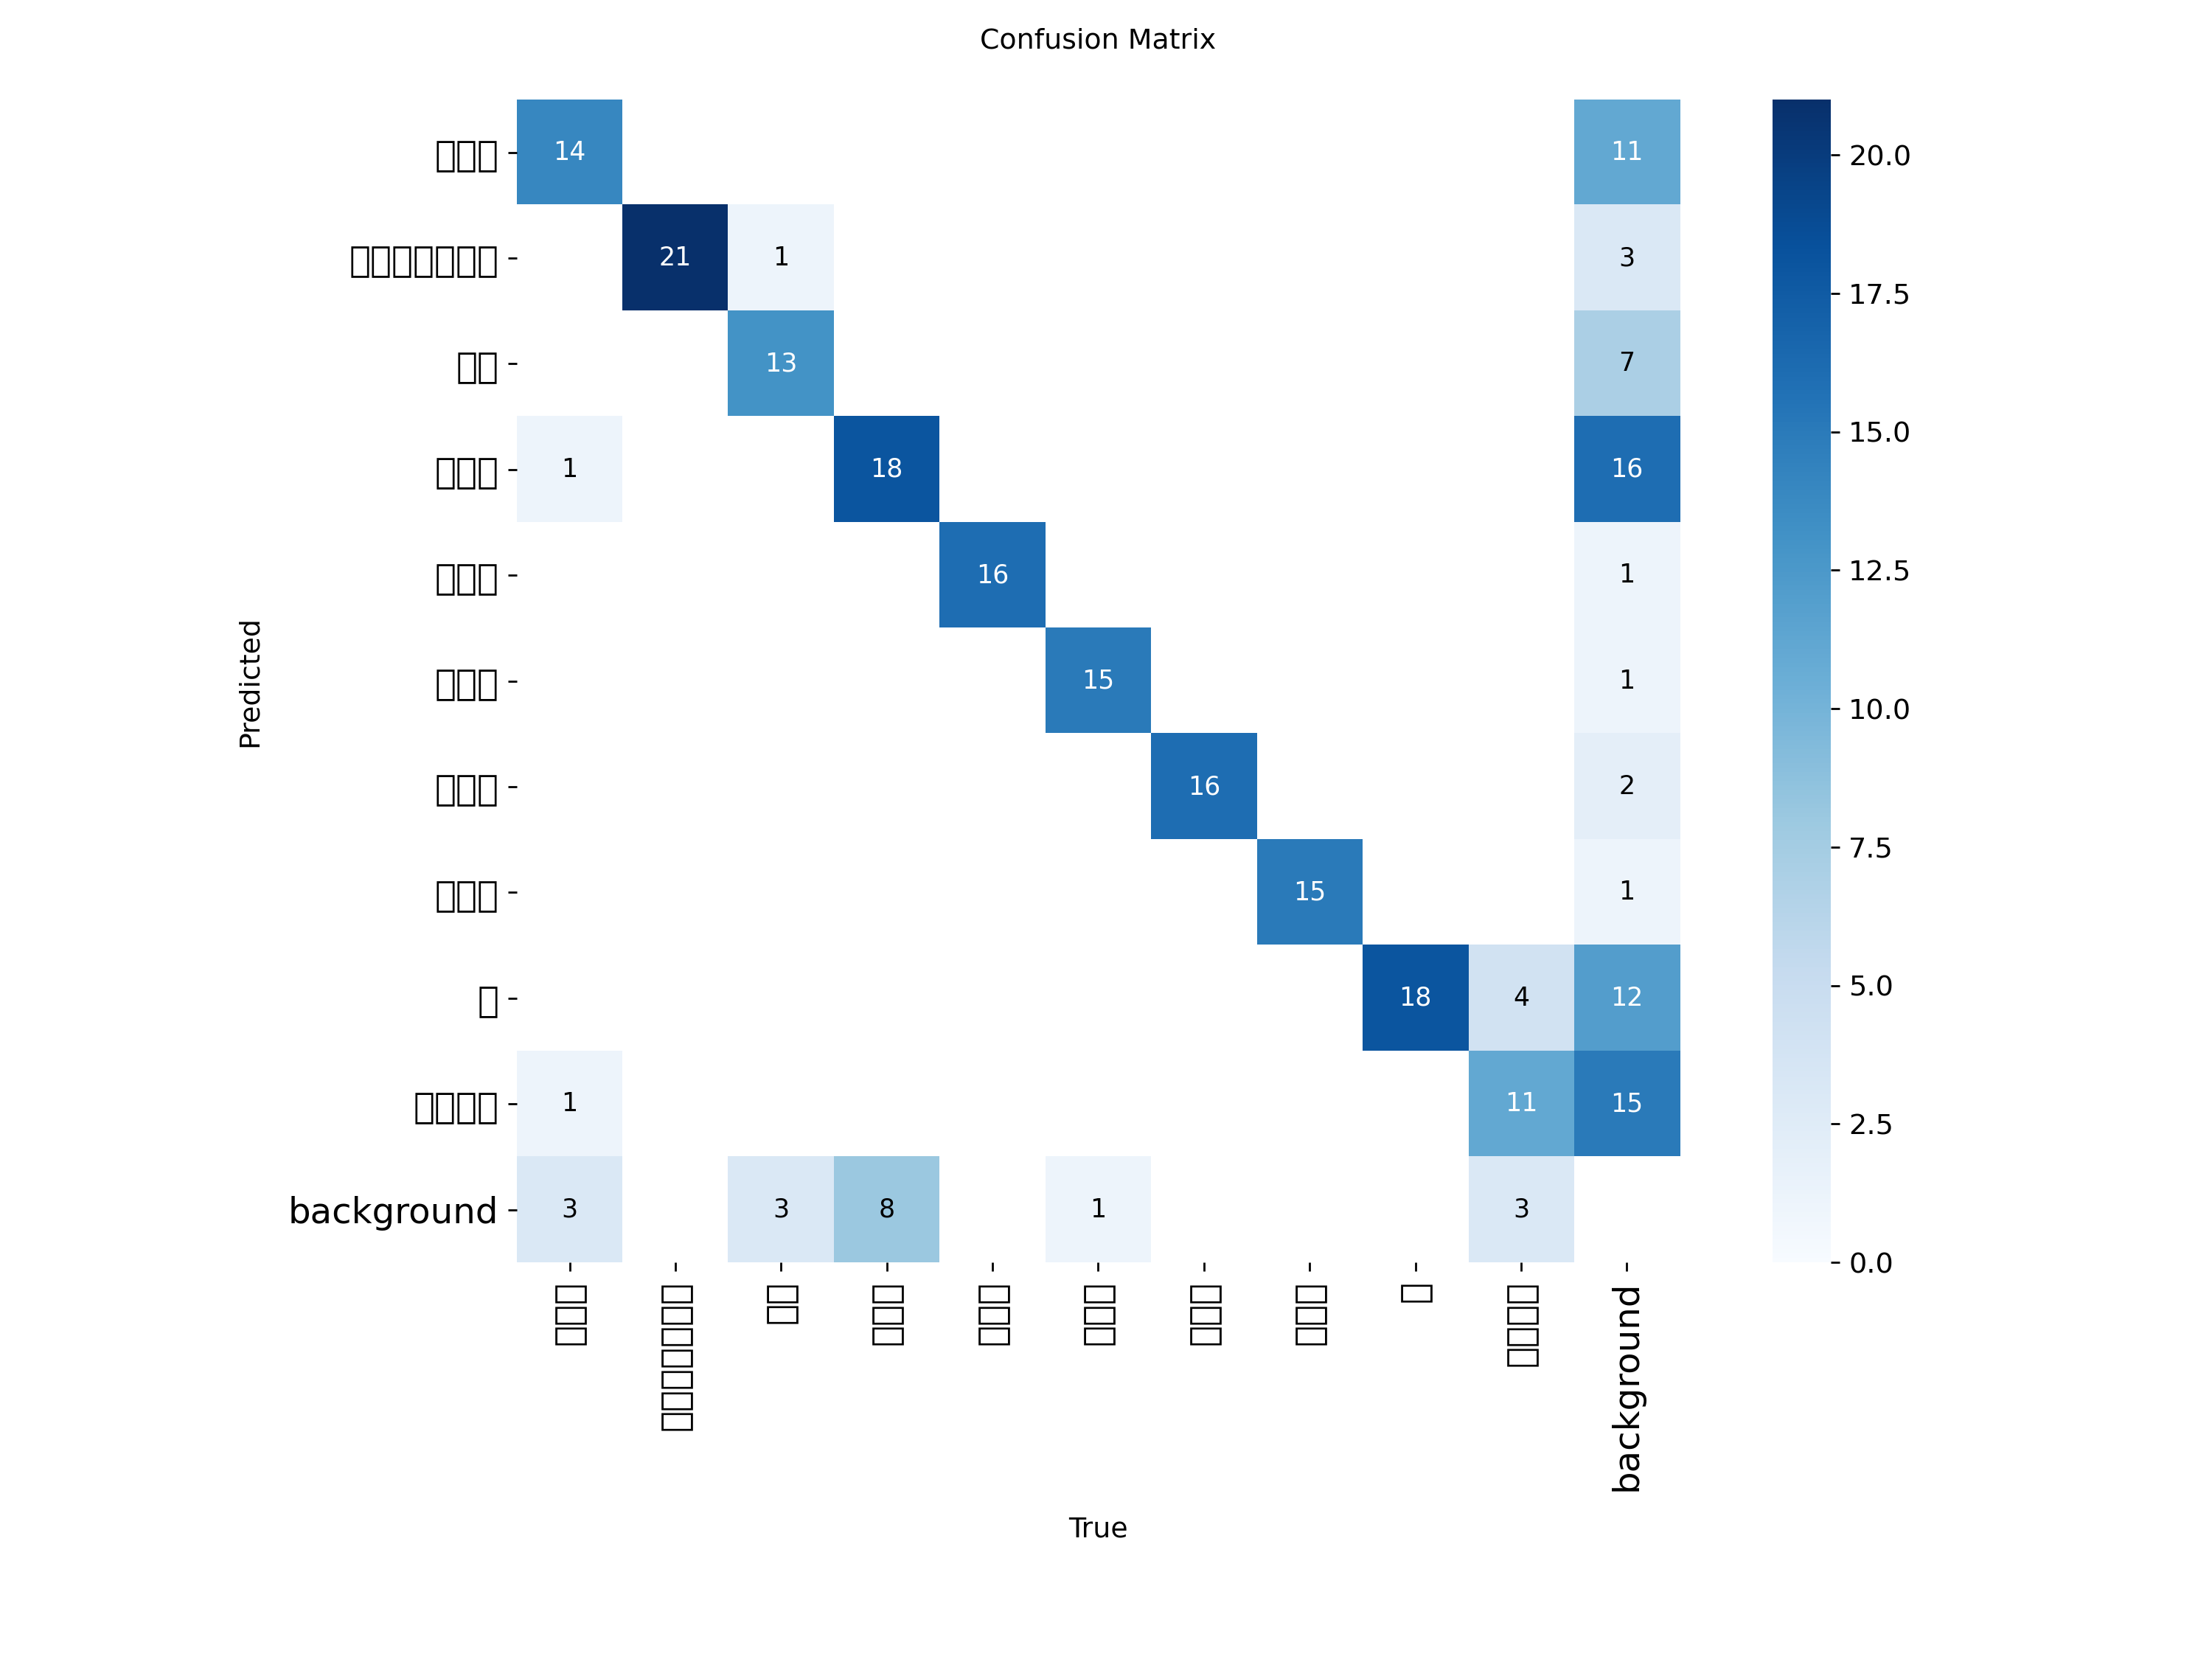

In [10]:
from PIL import Image
from IPython.display import display

conf_matrix_path = "/content/runs/train/exp/confusion_matrix.png"
display(Image.open(conf_matrix_path))

In [11]:
print(f"📊 Precision     : {metrics.box.mp:.3f}")
print(f"📊 Recall        : {metrics.box.mr:.3f}")
print(f"📊 mAP@0.5       : {metrics.box.map50:.3f}")
print(f"📊 mAP@0.5:0.95  : {metrics.box.map:.3f}")

📊 Precision     : 0.728
📊 Recall        : 0.885
📊 mAP@0.5       : 0.841
📊 mAP@0.5:0.95  : 0.712


In [12]:
print(metrics)


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e3720ef6d90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

In [13]:
import pandas as pd

df = pd.read_csv('/content/runs/train/exp/results.csv')
print(df.columns)

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


In [14]:
print(df.columns.to_list())

['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


In [15]:
last = df.iloc[-1]

print(f"📊 Precision     : {last['metrics/precision(B)']:.3f}")
print(f"📊 Recall        : {last['metrics/recall(B)']:.3f}")
print(f"📊 mAP@0.5       : {last['metrics/mAP50(B)']:.3f}")
print(f"📊 mAP@0.5:0.95  : {last['metrics/mAP50-95(B)']:.3f}")

📊 Precision     : 0.772
📊 Recall        : 0.779
📊 mAP@0.5       : 0.807
📊 mAP@0.5:0.95  : 0.693


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45733 (\N{HANGUL SYLLABLE NEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

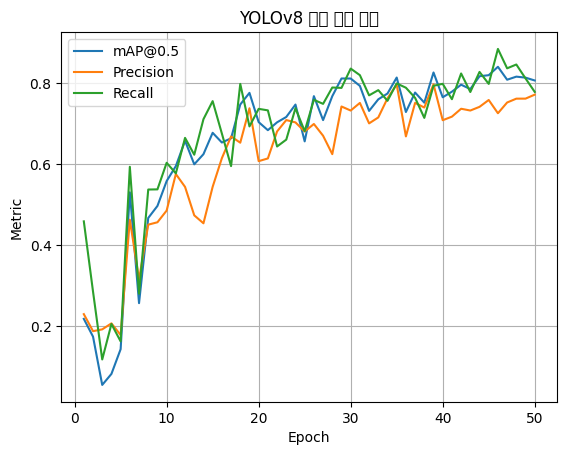

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# YOLO 훈련 결과 csv 파일 로드
df = pd.read_csv('/content/runs/train/exp/results.csv')

plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')

plt.xlabel("Epoch")
plt.ylabel("Metric")
plt.legend()
plt.grid()
plt.title("YOLOv8 학습 성능 지표")
plt.show()

In [17]:
# # 예시: 별도의 test.yaml 파일이 존재한다고 가정
# test_metrics = model.val(data='/content/drive/MyDrive/kdt_2506/dataset/foodDataset/data.yaml')
# print(test_metrics)

In [18]:
# # 단일 이미지 예측
# results = model.predict(source='/content/drive/MyDrive/kdt_2506/dataset/foodDataset/images/test/test_img.jpg',
#                         save=True,
#                         imgsz=480,
#                         conf=0.25)

# 폴더 단위 예측
results = model.predict(source='/content/drive/MyDrive/kdt_2506/dataset/foodDataset/images/test',
                        save=True,
                        imgsz=480,
                        conf=0.25,
                        save_txt=True)     # 예측된 좌표를 txt로 저장



image 1/200 /content/drive/MyDrive/kdt_2506/dataset/foodDataset/images/test/A020118XX_11001.jpg: 320x480 1 빵, 55.0ms
image 2/200 /content/drive/MyDrive/kdt_2506/dataset/foodDataset/images/test/A020118XX_11002.jpg: 160x480 1 빵, 54.6ms
image 3/200 /content/drive/MyDrive/kdt_2506/dataset/foodDataset/images/test/A020118XX_11003.jpg: 320x480 1 빵, 13.3ms
image 4/200 /content/drive/MyDrive/kdt_2506/dataset/foodDataset/images/test/A020118XX_11004.jpg: 256x480 1 빵, 74.6ms
image 5/200 /content/drive/MyDrive/kdt_2506/dataset/foodDataset/images/test/A020118XX_11005.jpg: 320x480 3 빵s, 12.5ms
image 6/200 /content/drive/MyDrive/kdt_2506/dataset/foodDataset/images/test/A020118XX_11006.jpg: 320x480 2 빵s, 12.0ms
image 7/200 /content/drive/MyDrive/kdt_2506/dataset/foodDataset/images/test/A020118XX_11007.jpg: 352x480 1 빵, 52.6ms
image 8/200 /content/drive/MyDrive/kdt_2506/dataset/foodDataset/images/test/A020118XX_11008.jpg: 320x480 2 빵s, 12.3ms
image 9/200 /content/drive/MyDrive/kdt_2506/dataset/foodData

In [ ]:
from IPython.display import Image, display
import os

predict_dir = '/content/runs/train/exp'

for img_name in os.listdir(predict_dir):
    if img_name.endswith(".jpg") or img_name.endswith(".png"):
        display(Image(filename=os.path.join(predict_dir, img_name)))
        break  # 첫 장만 표시 (원하면 반복문 삭제)


In [20]:
label_dir = os.path.join(predict_dir, "labels")
if os.path.exists(label_dir):
    print("예측된 라벨 파일 목록:")
    print(os.listdir(label_dir)[:5])  # 상위 5개만 출력
else:
    print("예측된 라벨 텍스트 파일이 없습니다.")


예측된 라벨 파일 목록:
['A020511XX_02712.txt', 'B031007XX_11052.txt', 'A220120XX_10400.txt', 'A220120XX_10401.txt', 'B010443XX_10268.txt']


In [ ]:
latest_predict_dir = '/content/runs/train/exp'

# 예측 결과 이미지 출력
for fname in os.listdir(latest_predict_dir):
    if fname.endswith('.jpg') or fname.endswith('.png'):
        display(Image(os.path.join(latest_predict_dir, fname)))

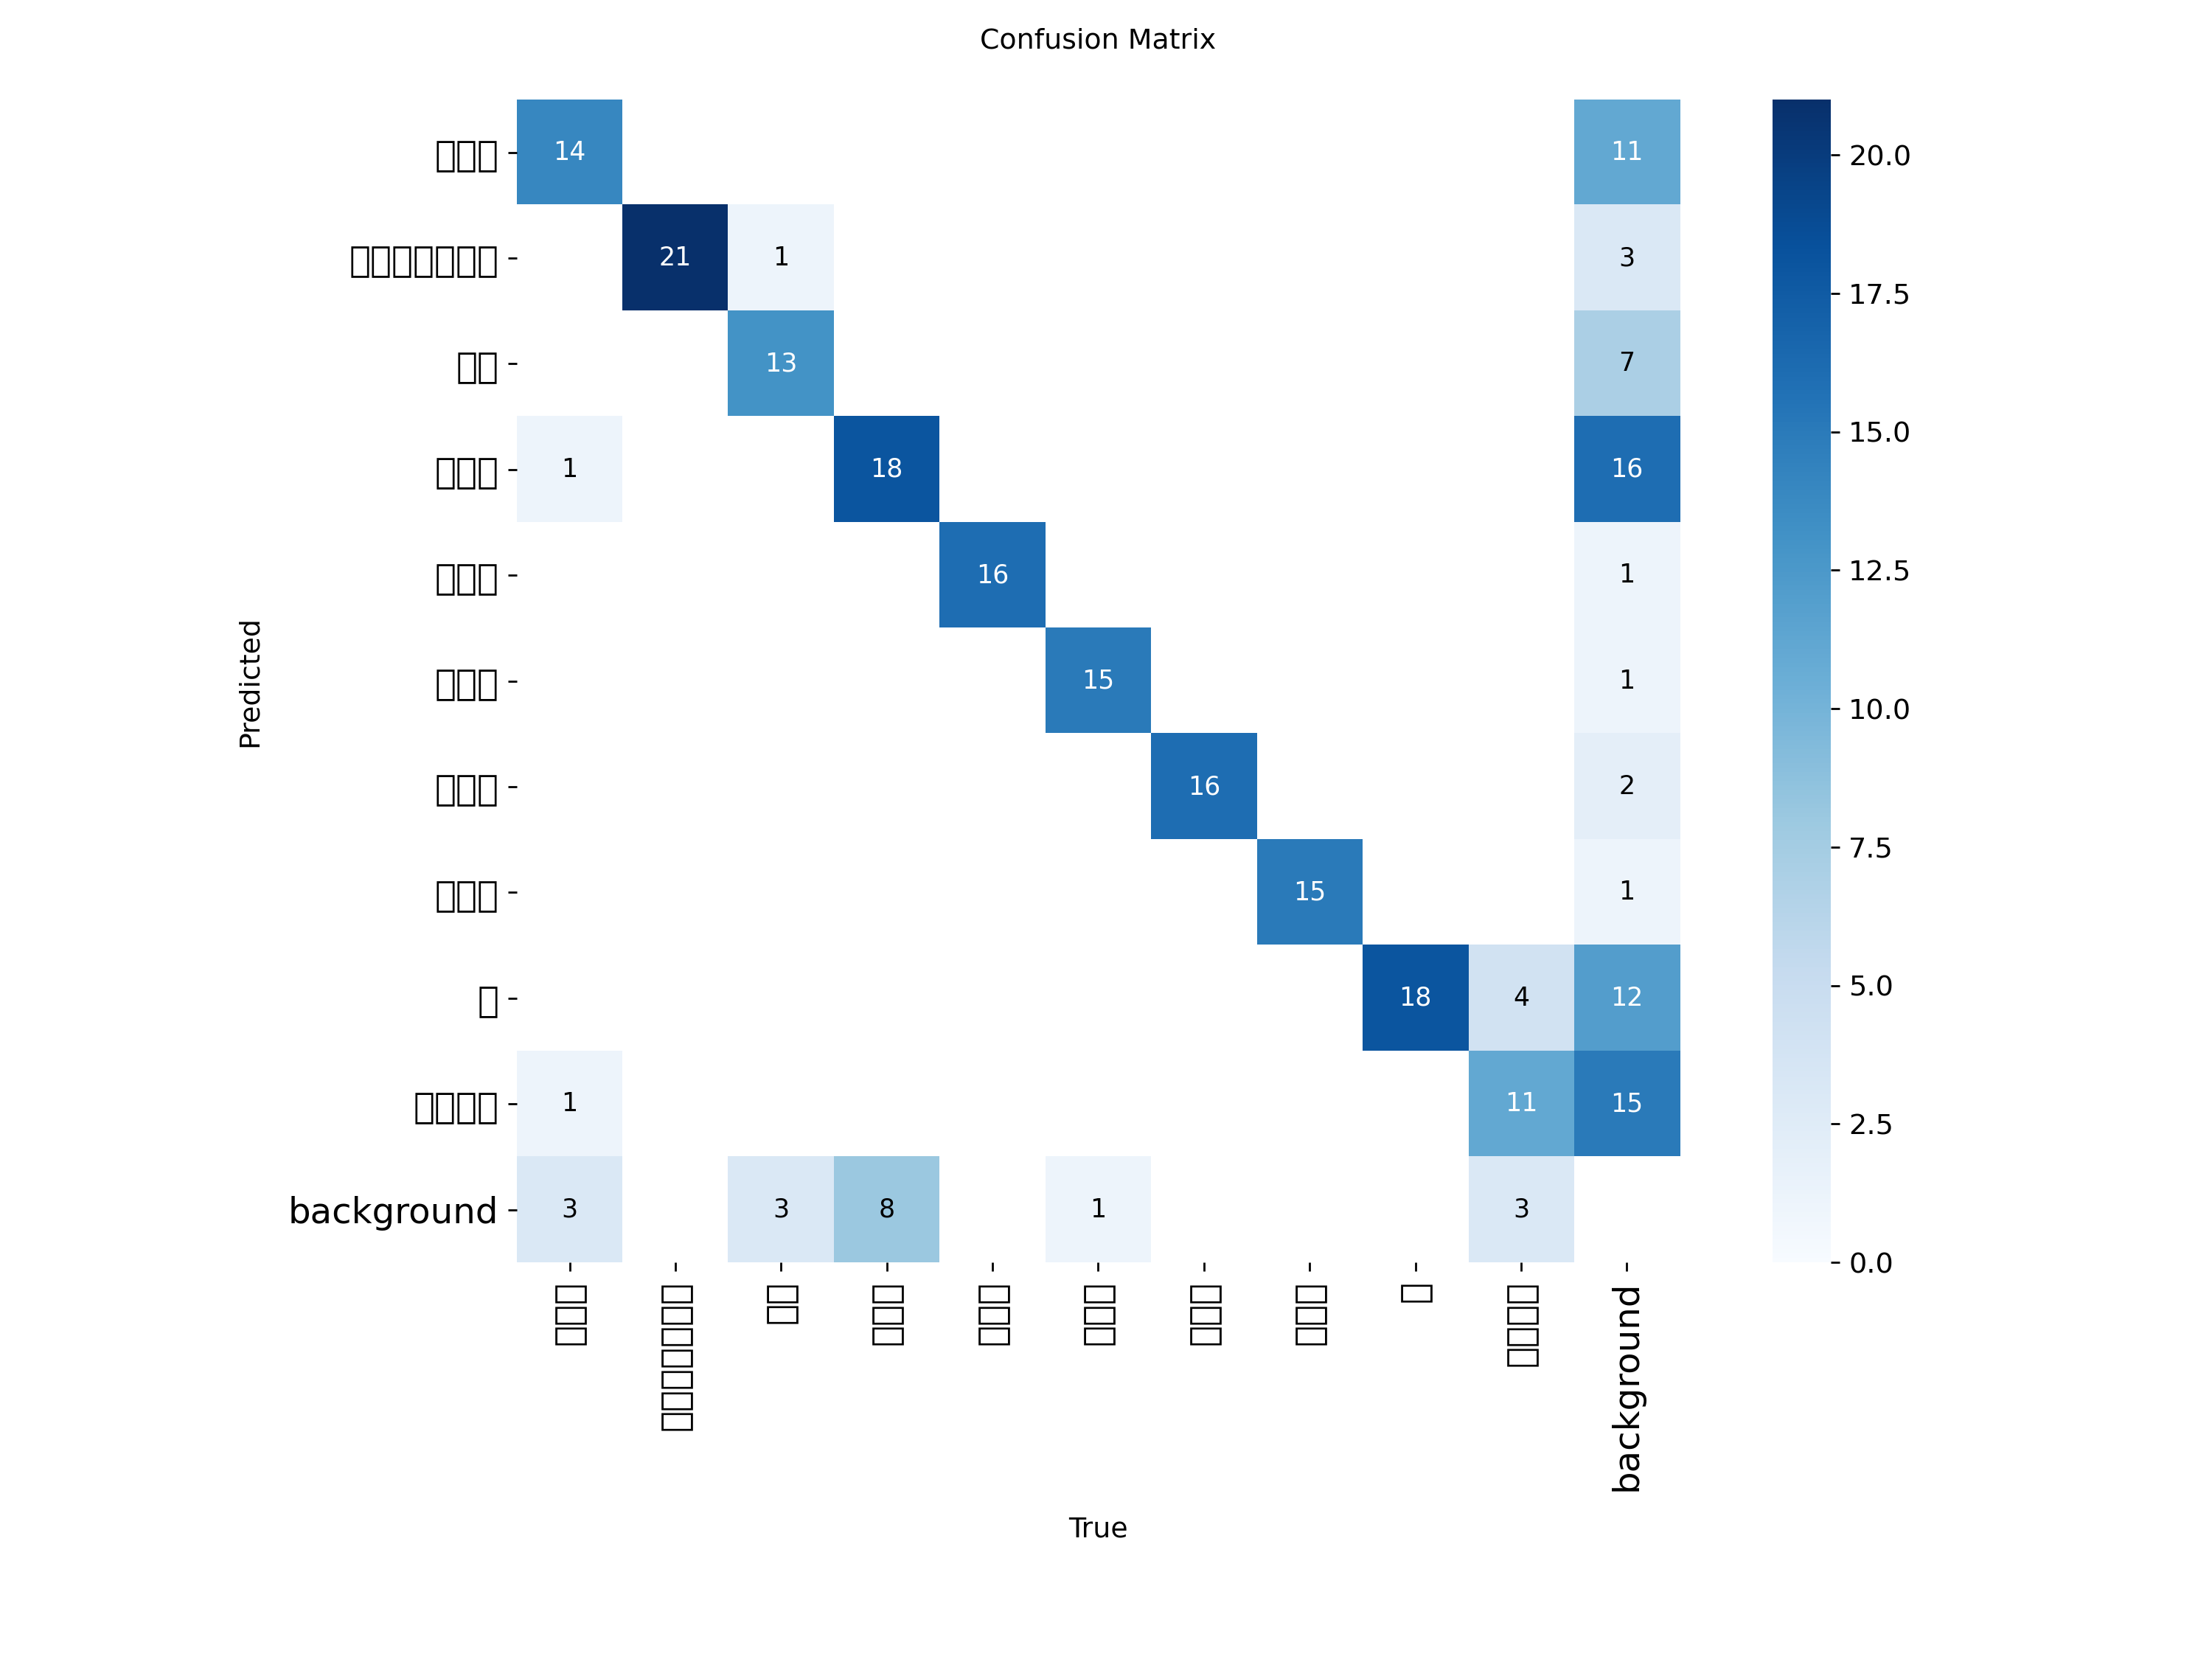

In [23]:
from PIL import Image
from IPython.display import display

conf_matrix_path = "/content/runs/train/exp/confusion_matrix.png"
img = Image.open(conf_matrix_path)
display(img)

In [ ]:
from IPython.display import display
import matplotlib.pyplot as plt
import os
from PIL import Image

# 예측 이미지가 저장된 폴더
predict_folder = '/content/runs/train/exp'

# 이미지 확장자 목록
valid_exts = ['.jpg', '.jpeg', '.png']

# 예측된 이미지 파일 목록
image_files = [f for f in os.listdir(predict_folder) if os.path.splitext(f)[-1].lower() in valid_exts]

print(f"총 예측 이미지 수: {len(image_files)}장")

# 예측된 각 이미지 시각화 (5개만 예시로)
for i, file in enumerate(image_files[:5]):
    img_path = os.path.join(predict_folder, file)
    img = Image.open(img_path)

    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"[{i+1}] {file}")
    plt.show()


In [25]:
print(results)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '백향과', 1: '베이글샌드위치', 2: '보쌈', 3: '복숭아', 4: '볶음면', 5: '볶음밥', 6: '부침개', 7: '비빔밥', 8: '빵', 9: '사과파이'}
obb: None
orig_img: array([[[ 77,  75,  87],
        [ 77,  75,  87],
        [ 77,  75,  87],
        ...,
        [ 39,  42,  56],
        [ 39,  42,  56],
        [ 39,  42,  56]],

       [[ 77,  75,  87],
        [ 77,  75,  87],
        [ 77,  75,  87],
        ...,
        [ 39,  42,  56],
        [ 39,  42,  56],
        [ 39,  42,  56]],

       [[ 77,  75,  87],
        [ 77,  75,  87],
        [ 77,  75,  87],
        ...,
        [ 39,  42,  56],
        [ 39,  42,  56],
        [ 39,  42,  56]],

       ...,

       [[176, 182, 205],
        [172, 178, 201],
        [169, 177, 200],
        ...,
        [ 72,  87, 119],
        [ 70,  88, 119],
        [ 76,  94, 125]],

       [[176, 182, 205],
        [172, 178, 201],
        [16

In [26]:
from collections import Counter

# 클래스 이름 가져오기 (results에서)
class_names = results[0].names

# 전체 클래스별 카운트
total_counts = Counter()

# 모든 이미지의 예측 결과 반복
for r in results:
    for box in r.boxes:
        cls = int(box.cls[0])
        total_counts[class_names[cls]] += 1

# 출력
print("전체 예측된 객체 통계:")
for cls_name, count in total_counts.items():
    print(f" - {cls_name}: {count}개")

전체 예측된 객체 통계:
 - 빵: 34개
 - 복숭아: 36개
 - 사과파이: 29개
 - 백향과: 20개
 - 볶음면: 24개
 - 비빔밥: 19개
 - 베이글샌드위치: 26개
 - 보쌈: 20개
 - 볶음밥: 20개
 - 부침개: 18개
